<a href="https://colab.research.google.com/github/akanksha-patil1404/Cifar-10/blob/main/Cifar_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

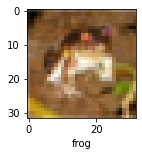

In [ ]:
plot_sample(X_train, y_train, 0)


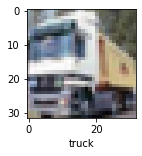

In [ ]:
plot_sample(X_train, y_train, 1)


to normalize the values

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.8117 - accuracy: 0.3573
Epoch 2/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.6219 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.5416 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4803 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4312 - accuracy: 0.4953


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 7s 21ms/step - loss: 1.5298 - accuracy: 0.4605


[1.5298269987106323, 0.46050000190734863]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.53      0.55      1000
           1       0.70      0.48      0.57      1000
           2       0.39      0.34      0.37      1000
           3       0.37      0.19      0.25      1000
           4       0.59      0.19      0.29      1000
           5       0.38      0.43      0.41      1000
           6       0.42      0.71      0.53      1000
           7       0.32      0.79      0.46      1000
           8       0.66      0.56      0.61      1000
           9       0.67      0.38      0.48      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.4751 - accuracy: 0.4721
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1284 - accuracy: 0.6043
Epoch 3/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9993 - accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9196 - accuracy: 0.6817
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8551 - accuracy: 0.7031
Epoch 6/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8009 - accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7596 - accuracy: 0.7357
Epoch 8/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7172 - accuracy: 0.7508
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6809 - accuracy: 0.7641
Epoch 10/10
1563/1563 [==============================] - 54s 35m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9168 - accuracy: 0.6942


[0.9167785048484802, 0.6941999793052673]

In [ ]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

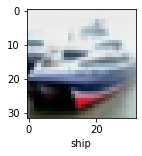

In [ ]:
plot_sample(X_test, y_test, 1)

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[4.84994729e-04, 6.14704622e-05, 1.64300436e-04, 9.31792259e-01,
        5.02433453e-04, 5.52522652e-02, 8.70141666e-03, 1.11779133e-04,
        2.91847996e-03, 1.05624713e-05],
       [8.10788595e-04, 6.34922832e-03, 7.08939388e-06, 3.14906924e-06,
        2.66358427e-07, 3.47212203e-10, 5.83809445e-09, 1.13202585e-08,
        9.92794335e-01, 3.51334056e-05],
       [9.27735120e-02, 1.40628979e-01, 8.10196158e-03, 1.47650819e-02,
        6.81941304e-03, 1.16585090e-03, 2.04653898e-03, 2.36621406e-03,
        7.28994727e-01, 2.33770139e-03],
       [9.92036581e-01, 4.25140344e-04, 2.74958112e-03, 7.41894648e-04,
        4.02953185e-04, 1.09262046e-05, 2.09225080e-04, 7.81081144e-06,
        3.41091282e-03, 4.89816512e-06],
       [4.56904473e-07, 3.13886958e-05, 2.02034526e-02, 3.78632508e-02,
        5.24078012e-01, 2.17338861e-03, 4.15647149e-01, 1.09296104e-06,
        1.67195356e-06, 5.77071226e-08]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

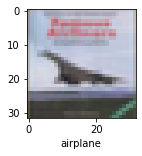

In [ ]:
plot_sample(X_test, y_test, 3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report:   \n", classification_report(y_test, y_classes))

Classification Report:   
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.80      0.81      0.81      1000
           2       0.55      0.62      0.59      1000
           3       0.50      0.51      0.51      1000
           4       0.64      0.64      0.64      1000
           5       0.68      0.54      0.60      1000
           6       0.75      0.79      0.77      1000
           7       0.72      0.77      0.74      1000
           8       0.76      0.84      0.80      1000
           9       0.88      0.66      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

